In [1]:
using EchoStateNetworks
using Gadfly
import DataFrames

    +(AbstractArray, DataArrays.DataArray) at /home2/minemoto/.julia/v0.4/DataArrays/src/operators.jl:276
is ambiguous with: 
    +(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at /home2/minemoto/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:107.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.DataArray{T<:Any, 2})
before the new definition.
    +(AbstractArray, DataArrays.AbstractDataArray) at /home2/minemoto/.julia/v0.4/DataArrays/src/operators.jl:300
is ambiguous with: 
    +(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at /home2/minemoto/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:107.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.AbstractDataArray{T<:Any, 2})
before the new definition.


In [2]:
T = Float64

data_range = 1:600
train_range = 1:300
test_range = 301:600

# desired signal is a sine wave
target(n) = 0.5sin(n/4)
data = T[target(n) for n in 0:length(data_range)-1]
data = reshape(data,1,length(data))

y_train = data[:, train_range]
x_train = zeros(T, size(y_train))
y_test = data[:, test_range]
x_test = zeros(T, size(y_test))


function show_reservoir_states(;feedback::Bool=false,discard::Integer=0,spectral_radius=1.0)
    esn = EchoStateNetwork{T}(Ni=1, No=1, Nr=20, sparsity=0.0, 
    spectral_radius=spectral_radius, teacher_forcing=feedback, leaking_rate=1.0)
    
    states = EchoStateNetworks.reservoir_states(esn, x_train, y_train)
    
    df = convert(DataFrames.DataFrame, hcat(collect(train_range),states'))
    map((x,y)->DataFrames.rename!(df, x,y), DataFrames.names(df)[2:end], [symbol(string("Unit$(i)")) for i=1:20])
    DataFrames.rename!(df, :x1, :time)
    
    ps = [plot(df[discard+1:end,:],x="time", y=string(i), Geom.line ) for i in DataFrames.names(df)[2:end]]
    ps = reshape(ps, 4,5)
    p = vstack([hstack(ps[:,i]) for i=1:5]...)
    draw(SVG(20cm,25cm), p)
end

show_reservoir_states (generic function with 1 method)

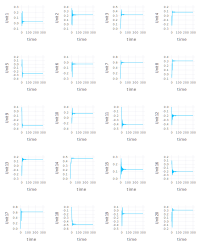

In [3]:
show_reservoir_states(feedback=false,spectral_radius=1.0)

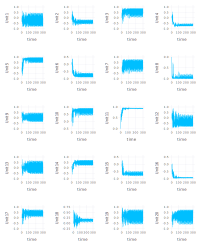

In [7]:
show_reservoir_states(feedback=false,spectral_radius=1.5)

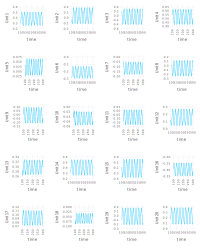

In [4]:
show_reservoir_states(feedback=true,discard=100,spectral_radius=1.0)

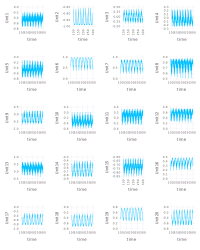

In [8]:
show_reservoir_states(feedback=true,discard=100,spectral_radius=1.5)